In [2]:
import numpy as np
import matplotlib.pyplot as plt

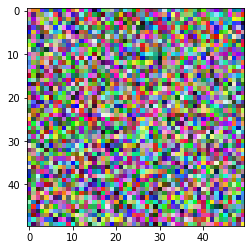

In [3]:
#generowanie przypadkowego rysunku
#uwaga! w tym wypadku pyplot koduje kolor przy użyciu wartości <0,1)
data = np.random.random(size=(50, 50, 3))

plt.imshow(data, interpolation='none')
plt.show()

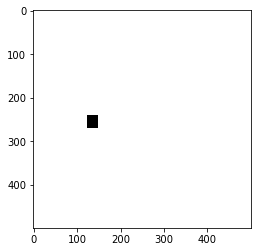

In [19]:
#generowanie obrazu RGB - kodowanie RGB od 0 do 255
data=np.zeros((500,500, 3), dtype=np.uint8)
data.fill(255)
for i in range(240, 270):
    for j in range(123,150):
        data[i, j]=0.0
        data[i,j,1]=0.0
plt.imshow(data, interpolation='none', aspect=1)
plt.show()
plt.imsave('test.png', data, format='png') #zapis obrazu

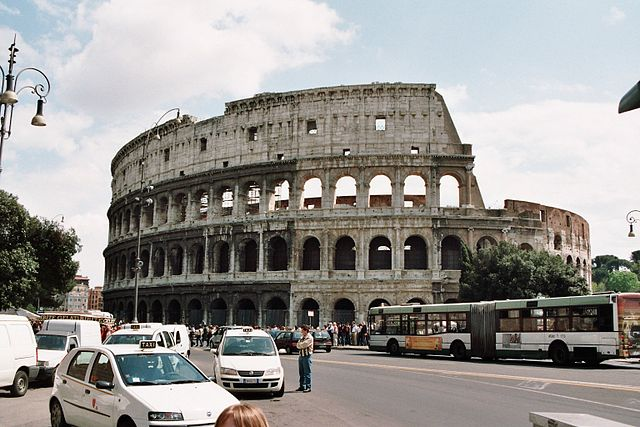

427
640


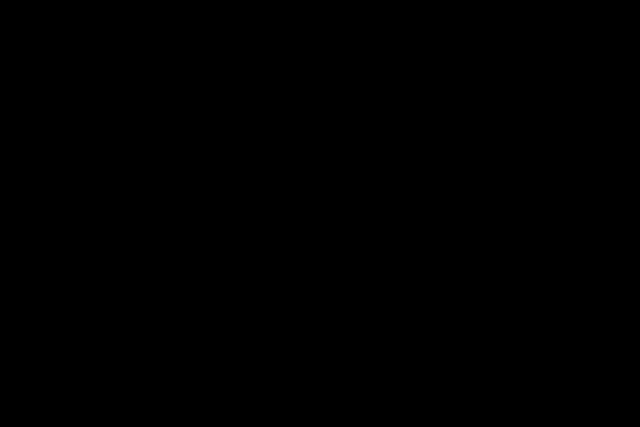

In [13]:
#otwieranie rysunków przy użyciu biblioteki PIL
from PIL import Image

path="./Koloseum.png"
img = Image.open(path)

display(img)




RGB = np.array(img) # tworzymy tablicę RGB na podstawie rysunku. Uwaga! wartosci sa od 0 do 255 powstaje tablica typu numpy.uint8t

print(len(RGB))
print(len(RGB[0]))

RGB2= np.zeros((len(RGB), len(RGB[0]),3), dtype=np.uint8,) # tworzymy nowa tablice typu numpy.uint8t

img2 = Image.fromarray(RGB2, 'RGB') #Biblioteka PIL tworzymy nowy rysunek na podstawie tablicy RGB2 o rozmiarach takich samych jak img


display(img2)

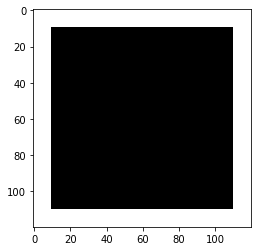

In [72]:
#funkcja do napisania
#zadanie dodatkowe - prosze zmodyfikować funkcje tak, by można było przekazać kolor rysowanego prostokata jako param
def prostokat(x, y, w, h):
    #funkcja zwraca tablicę RGB typu uint8 o wymiarach 100x100x3
    data=np.zeros((2*x+w,2*y+h, 3), dtype=np.uint8)
    data.fill(255)
    for i in range(x, x+h):
        for j in range(y,y+w):
            data[i, j]=0
    plt.imshow(data, interpolation='none', aspect=1)
    plt.show()
    pass

prostokat(10,10,100,100)

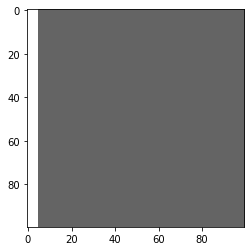

In [115]:
#funkcja do napisania
#zadanie dodatkowe - prosze zmodyfikować funkcje tak, by można było przekazać kolor rysowanego prostokata jako param
def prostokat(x, y, w, h):
    #funkcja zwraca tablicę RGB typu uint8 o wymiarach 100x100x3
    assert x>0 or y>0,"zle wartosci"
        
    if x+w >100:
        w = 100-x
    if y+h >100:
        h = 100-y
    data=np.zeros((100,100, 3), dtype=np.uint8)
    data.fill(255)
    for i in range(y, y+h):
        for j in range(x,x+w):
            data[i, j]=100
    plt.imshow(data, interpolation='none', aspect=1)
    plt.show()
    pass

prostokat(5,0,120,150)

102


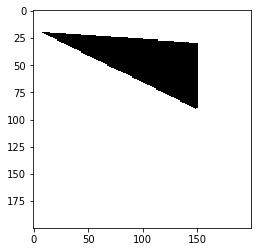

In [51]:
data=np.zeros((200,200,3), dtype=np.uint8)
data.fill(255)
srodek = 0

def liniaN(x1, y1, x2, y2):

    
#jezeli odcinek jest punktem
    if x1==x2 and y1==y2:
        data[x1,y1]=0
        
    else:
        if abs(x2-x1)>abs(y2-y1):
            a = (y2-y1)/(x2-x1)
            if x1>x2:
                x1,x2 = x2,x1
                y1,y2 = y2,y1
            for x in range(x1,x2):
                y = round(y1+a*(x-x1))
                data[y,x]=0
        else:
            a=(x2-x1)/(y2-y1)
            if y1>y2:
                x1,x2 = x2,x1
                y1,y2 = y2,y1
            for y in range(y1,y2):
                x = round(x1+a*(y-y1))
                data[y,x]=0
    

def fillR(x, y, RGB):
    
    frcolor = 0
    bgcolor = 255
    if x>0 and x<len(RGB[0]) and y>0 and y < len(RGB):
        if RGB[y,x,0] == frcolor and RGB[y,x,1] == frcolor and RGB[y,x,2] == frcolor:
            return 0
        RGB [y,x] = frcolor
        fillR(x + 1, y, RGB)
        fillR(x - 1, y, RGB)
        fillR(x, y + 1, RGB)
        fillR(x, y - 1, RGB)


x1 = 8
x2 = 150
x3 = 150
y1 = 20
y2 = 30
y3 = 90
        
liniaN(x1,y1,x3,y3)
liniaN(x2,y2,x3,y3)
liniaN(x1,y1,x2,y2)

def srodekT(x1,x2,x3,y1,y2,y3):
    srodek = [int(((x1+x2+x3)/3)),int(((y1+y2+y3)/3))]
    return srodek

a = srodekT(x1,x2,x3,y1,y2,y3)

print(a[0])

fillR(a[0],a[1],data)

plt.imshow(data, interpolation='none', aspect=1)

In [4]:
def fillR(x, y, RGB):
    
    frcolor = 0
    bgcolor = 255
    if x>0 and x<len(RGB[0]) and y>0 and y < len(RGB):
        if RGB[y,x,0] == frcolor and RGB[y,x,1] == frcolor and RGB[y,x,2]== frcolor:
            return 0
        RGB [y,x] = frcolor
        fillR(x+1,y,RGB)
        fillR(x-1,y,RGB)
        fillR(x,y+1,RGB)
        fillR(x,y-1,RGB)

In [5]:
x1 = 5
x2 = 80
x3 = 50
y1 = 35
y2 = 65
y3 = 80

srodekT = [((x1+x2+x3)/3),((y1+y2+y3)/3)]

print (srodekT)

[45.0, 60.0]


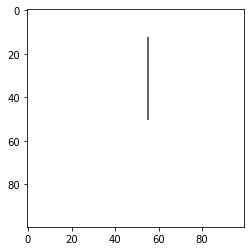

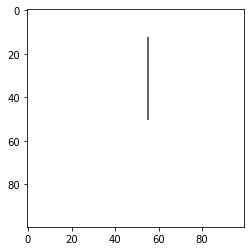

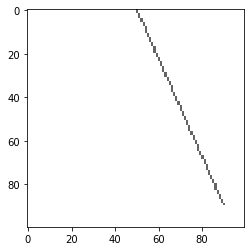

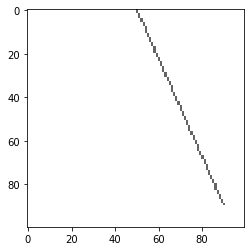

In [14]:
import time

start = time.time()

end = time.time()
print(end - start)

def liniaB(x1, y1, x2, y2):
    data=np.zeros((100,100,3), dtype=np.uint8)
    data.fill(255)
    
#jezeli odcinek jest punktem
    if x1==x2 and y1==y2:
        data[x1,y1]=100
        
    else:
        if x1>x2:
            x1,x2 = x2,x1
            y1,y2 = y2,y1
        dx = x2 - x1
        dy = y2 - y1
        D = 2 * dy - dx
        y = y1
        
        for x in range(x1,x2):
            data[x,y] = 100
            if D > 0:
                y = y + 1
                D = D - 2 * dx
            D = D + 2 * dy
        

            
    plt.imshow(data, interpolation='none', aspect=1)
    plt.show()
    
start = time.time()         
liniaB(51,19,13,55)
end = time.time()

start = time.time()
liniaN(51,19,13,55)
end = time.time()
print
# liniaB(13,99,55,68)
# liniaB(15,30,37,12)
liniaB(90,90,0,50)
liniaN(90,90,0,50)
time
# liniaB(0,50,90,90)
# liniaB(50,50,50,50)

# liniaN(51,19,13,55)
# liniaN(13,99,55,68)
# liniaN(15,30,37,12)
# liniaN(90,90,0,50)
# liniaN(0,50,90,90)
# liniaN(50,50,50,50)